In [35]:
from google_play_scraper import app

import pandas as pd
import numpy as np
import re

In [36]:
#Proses Pengambilan Data 
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.kai.kaiticketing',
    sleep_milliseconds=0, # defaults to 0
    lang='id', 
    country='id', 
    sort=Sort.MOST_RELEVANT,
    filter_score_with=None # defaults to None(means all score)
)

In [37]:
#Perubahan dari List ke DataFrame agar dapat diproses lebih lanjut

df = pd.DataFrame(result)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,da8c708d-17d3-47cc-922e-2e13aebc8cba,Adi Wirantomo,https://play-lh.googleusercontent.com/a/AItbvm...,"Appl sangat mudah dan sangat membantu, tetapi ...",2,12,5.0.1,2022-07-26 01:41:31,None,NaT
1,ed1a5073-9dd3-434c-8278-7019b0517aa7,Vivin Liliyani,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasi buruk sekali. Transaksi berhasil suda...,1,6,5.0.1,2022-07-26 04:48:22,None,NaT
2,2f256a96-f4c9-4cd9-8556-0e23cd2127b5,Muflihul Hakim Bachtiyar,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasi ini kadang mengecewakan karna banyak ...,1,50,5.0.1,2022-07-21 19:22:32,None,NaT
3,64b8f29c-3fcb-42ef-b8d3-0f73d0b260f6,Ayu Maria,https://play-lh.googleusercontent.com/a/AItbvm...,Tolong dong aplikasinya di perbaiki. Beberapa ...,2,64,5.0.1,2022-07-18 22:05:11,None,NaT
4,04284ff0-7d73-48ff-8ceb-94a6b5e035fe,Ica Calla,https://play-lh.googleusercontent.com/a-/AFdZu...,Sudah sebulan ini tiap mau pulang naik kereta ...,2,0,5.0.1,2022-07-26 13:03:21,None,NaT
...,...,...,...,...,...,...,...,...,...,...
50451,cb50c881-81e0-4e9a-88c7-8791b3f0d596,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,None,5,0,None,2015-06-24 23:07:51,None,NaT
50452,c2450799-30c0-4882-8bf1-396076a457ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,None,5,0,None,2015-10-05 23:31:27,None,NaT
50453,ee99481e-9308-479f-a954-ff9fe634a8b8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,None,2,0,None,2015-04-03 23:00:25,None,NaT
50454,ee510c36-09b5-4cb8-a448-c719ff4984e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,None,4,0,None,2016-10-28 17:43:03,None,NaT


In [ ]:
#Menyimpan hasil pengambilan data dalam bentuk csv
df.to_csv("KAI_scrape_dataa1.csv")

In [38]:
#Data yang didapatkan sebagai bahan penelitian

df = pd.read_csv('KAI_scrape_data1.csv')
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,600c825c-8952-4ea7-9e06-61f6ef24e437,Yusi El Yusi,https://play-lh.googleusercontent.com/a-/AFdZu...,"Setiap memilih kursi, bolak balik kembali ke m...",2,20,4.9.8,2022-07-06 13:17:12,"Hi Kak, mohon maaf atas kendalanya untuk kenda...",2022-07-04 10:06:37
1,1,37377969-3cb0-4868-9116-830dba61b2f7,Nining Syofia Rani,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasinya membantu tapi belum sempurna. Meto...,3,323,4.9.8,2022-06-12 21:05:21,NaN,NaN
2,2,2ab4ba26-c3ce-47be-87a2-36d50866a3d5,Nur Syafi'ah,https://play-lh.googleusercontent.com/a-/AFdZu...,"Update jadi malah lemot, gak respon. Setiap pi...",2,347,4.9.8,2022-06-12 09:43:53,NaN,NaN
3,3,8e62271f-bfac-436e-970d-a9130e302836,Nano Sukarno,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasi cacat! Sangat jelas kalau developer g...,1,283,4.9.7,2022-05-17 01:20:59,NaN,NaN
4,4,adb6a4cc-d1ef-4b80-aaa0-f8781b908398,Raja Game,https://play-lh.googleusercontent.com/a/AItbvm...,Aplikasi sering error saat untuk melakukan pem...,1,278,4.9.7,2022-05-13 18:21:03,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55214 entries, 0 to 55213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            55214 non-null  int64 
 1   reviewId              55214 non-null  object
 2   userName              55214 non-null  object
 3   userImage             55214 non-null  object
 4   content               55203 non-null  object
 5   score                 55214 non-null  int64 
 6   thumbsUpCount         55214 non-null  int64 
 7   reviewCreatedVersion  45044 non-null  object
 8   at                    55214 non-null  object
 9   replyContent          4243 non-null   object
 10  repliedAt             4243 non-null   object
dtypes: int64(3), object(8)
memory usage: 4.6+ MB


In [40]:
df[['userName','score','at','content']].head()

,userName,score,at,content
0,Yusi El Yusi,2,2022-07-06 13:17:12,"Setiap memilih kursi, bolak balik kembali ke m..."
1,Nining Syofia Rani,3,2022-06-12 21:05:21,Aplikasinya membantu tapi belum sempurna. Meto...
2,Nur Syafi'ah,2,2022-06-12 09:43:53,"Update jadi malah lemot, gak respon. Setiap pi..."
3,Nano Sukarno,1,2022-05-17 01:20:59,Aplikasi cacat! Sangat jelas kalau developer g...
4,Raja Game,1,2022-05-13 18:21:03,Aplikasi sering error saat untuk melakukan pem...


# TEXT PREPROCESSING

In [41]:
#Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
warnings.filterwarnings("ignore")

In [42]:
df = pd.read_csv('KAI_scrape_data1.csv')
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,600c825c-8952-4ea7-9e06-61f6ef24e437,Yusi El Yusi,https://play-lh.googleusercontent.com/a-/AFdZu...,"Setiap memilih kursi, bolak balik kembali ke m...",2,20,4.9.8,2022-07-06 13:17:12,"Hi Kak, mohon maaf atas kendalanya untuk kenda...",2022-07-04 10:06:37
1,1,37377969-3cb0-4868-9116-830dba61b2f7,Nining Syofia Rani,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasinya membantu tapi belum sempurna. Meto...,3,323,4.9.8,2022-06-12 21:05:21,NaN,NaN
2,2,2ab4ba26-c3ce-47be-87a2-36d50866a3d5,Nur Syafi'ah,https://play-lh.googleusercontent.com/a-/AFdZu...,"Update jadi malah lemot, gak respon. Setiap pi...",2,347,4.9.8,2022-06-12 09:43:53,NaN,NaN
3,3,8e62271f-bfac-436e-970d-a9130e302836,Nano Sukarno,https://play-lh.googleusercontent.com/a-/AFdZu...,Aplikasi cacat! Sangat jelas kalau developer g...,1,283,4.9.7,2022-05-17 01:20:59,NaN,NaN
4,4,adb6a4cc-d1ef-4b80-aaa0-f8781b908398,Raja Game,https://play-lh.googleusercontent.com/a/AItbvm...,Aplikasi sering error saat untuk melakukan pem...,1,278,4.9.7,2022-05-13 18:21:03,NaN,NaN


In [44]:
#Pilih Kolom Content Saja
df_data = df[['content']]
df_data

,content
0,"Setiap memilih kursi, bolak balik kembali ke m..."
1,Aplikasinya membantu tapi belum sempurna. Meto...
2,"Update jadi malah lemot, gak respon. Setiap pi..."
3,Aplikasi cacat! Sangat jelas kalau developer g...
4,Aplikasi sering error saat untuk melakukan pem...
...,...
55202,Jozz
55203,Oke
55204,Ok
55205,Lemot


In [45]:
# TAHAP CLEANING TEXT 

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    emoji_pattern = re.compile("["
                         u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text

    return text

In [46]:
#Proses Pengaplikasian Fungsi Cleaning Text

df_data['content_clean'] = df_data['content'].apply(cleaningText)
df_data.head()

,content,content_clean
0,"Setiap memilih kursi, bolak balik kembali ke m...",Setiap memilih kursi bolak balik kembali ke me...
1,Aplikasinya membantu tapi belum sempurna. Meto...,Aplikasinya membantu tapi belum sempurna Metod...
2,"Update jadi malah lemot, gak respon. Setiap pi...",Update jadi malah lemot gak respon Setiap pili...
3,Aplikasi cacat! Sangat jelas kalau developer g...,Aplikasi cacat Sangat jelas kalau developer ga...
4,Aplikasi sering error saat untuk melakukan pem...,Aplikasi sering error saat untuk melakukan pem...


In [47]:
# TAHAP CASE FOLDING (merubah teks menjadi huruf kecil)

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    
    return text

In [48]:
#Proses Pengaplikasian Fungsi Case Folding

df_data['content_clean'] = df_data['content_clean'].apply(casefoldingText)
df_data.head()

,content,content_clean
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...


In [49]:
# TAHAP TOKENIZING

from nltk.tokenize import word_tokenize

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

#Proses Pengaplikasian Fungsi Tokenizing

df_data['content_preprocessing'] = df_data['content_clean'].apply(tokenizingText)
df_data.head()

,content,content_clean,content_preprocessing
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...,"[setiap, memilih, kursi, bolak, balik, kembali..."
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...,"[aplikasinya, membantu, tapi, belum, sempurna,..."
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...,"[update, jadi, malah, lemot, gak, respon, seti..."
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...,"[aplikasi, cacat, sangat, jelas, kalau, develo..."
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...,"[aplikasi, sering, error, saat, untuk, melakuk..."


In [50]:
# TAHAP FILTERING (STOPWORD / menghapus kata yang tidak penting)

def filteringText(text): # Remove stopwords in a text
    listStopwords = StopWordRemoverFactory().get_stop_words()
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

#Proses Pengaplikasian Fungsi Filtering

df_data['content_preprocessing'] = df_data['content_preprocessing'].apply(filteringText)
df_data.head()

,content,content_clean,content_preprocessing
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...,"[memilih, kursi, bolak, menu, lemotsampai, wak..."
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...,"[aplikasinya, membantu, sempurna, metode, pemb..."
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...,"[update, lemot, gak, respon, pilih, kursi, pil..."
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...,"[aplikasi, cacat, developer, gagal, aplikasi, ..."
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...,"[aplikasi, error, pemesanan, jaringan, wifi, l..."


In [51]:
# TAHAP STEMMING (pembentukan kata dasar)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

#Proses Pengaplikasian Fungsi Stemming

df_data['content_preprocessing'] = df_data['content_preprocessing'].apply(stemmingText)
df_data.drop_duplicates(subset = 'content_clean', inplace = True)
df_data.head()

,content,content_clean,content_preprocessing
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...,"[pilih, kursi, bolak, menu, lemotsampai, waktu..."
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...,"[aplikasi, bantu, sempurna, metode, bayar, bgt..."
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...,"[update, lot, gak, respon, pilih, kursi, pilih..."
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...,"[aplikasi, cacat, developer, gagal, aplikasi, ..."
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...,"[aplikasi, error, mesan, jaring, wifi, lancar,..."


In [52]:
#Cek Hasil Preprocessing

df_data

,content,content_clean,content_preprocessing
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...,"[pilih, kursi, bolak, menu, lemotsampai, waktu..."
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...,"[aplikasi, bantu, sempurna, metode, bayar, bgt..."
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...,"[update, lot, gak, respon, pilih, kursi, pilih..."
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...,"[aplikasi, cacat, developer, gagal, aplikasi, ..."
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...,"[aplikasi, error, mesan, jaring, wifi, lancar,..."
...,...,...,...
55129,"Tolong buat KAI,,, biar boleh bawa hewan di da...",tolong buat kai biar boleh bawa hewan di dalem...,"[tolong, kai, biar, bawa, hewan, dalem, kereta..."
55147,App ini keluar sendiri dengan cara mengatakan ...,app ini keluar sendiri dengan cara mengatakan ...,"[app, unfortunately, this, app, is, stopped, k..."
55161,sue sue,sue sue,"[sue, sue]"
55165,coba coba,coba coba,"[coba, coba]"


# LEXICON

In [53]:
#Proses Analisis Sentimen Dengan Lexicon

lexicon_positive = dict()
import csv
with open('positive.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_negative[row[0]] = int(row[1])
      
def analisis_sentimen(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [54]:
#Implementasi Fungsi Analisis Sentimen dan Merapihkan DataFrame Setelah Analisis Sentimen
results = df_data['content_preprocessing'].apply(analisis_sentimen)
results = list(zip(*results))
df_data['polarity_score'] = results[0]
df_data['polarity'] = results[1]
print(df_data['polarity'].value_counts())
df_data
df_data.to_csv(r'Hasil.csv', index = False, header = True,index_label=None)

negative    24700
positive     9810
neutral      6649
Name: polarity, dtype: int64


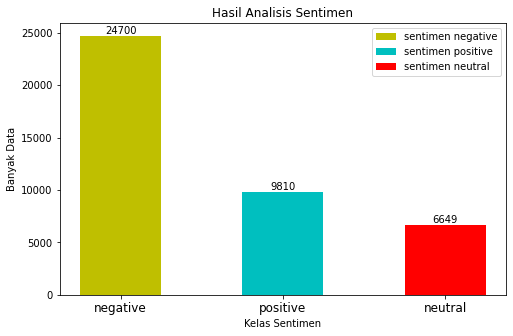

In [23]:
#Visualisasi Dalam Bentuk Diagram Batang

import matplotlib.pyplot as plt

sentimen = ["negative", "positive", "neutral"]
banyakdata = [24700, 9810, 6649]
y = [24700, 9810, 6649]
y1 = [24700, 9810, 6649]
y2 = [24700, 9810, 6649]
c = ['y', 'c', 'r']
x = np.arange(len(sentimen))
width = 0.5

fig, ax = plt.subplots(figsize=(8, 5))
y = ax.bar(x , y, width, label='sentimen negative', color='y')
y1 = ax.bar(x , y1, width, label='sentimen positive', color='c')
y2 = ax.bar(x , y2, width, label='sentimen neutral', color='r')

plt.bar(sentimen, banyakdata, width=0.5, color=c)
for i in range(len(sentimen)):
    plt.text(i, banyakdata[i], banyakdata[i], ha="center", va="bottom")
    
plt.xlabel("Kelas Sentimen")
plt.ylabel("Banyak Data")
ax.set_xticks(x)
ax.set_xticklabels(sentimen, size=12)
plt.legend()
plt.title("Hasil Analisis Sentimen")
plt.show()

In [56]:
#Menunjukkan hasil dalam bentuk presentase

hasil = df_data['polarity'].value_counts(normalize=True)*100
hasil

negative    60.011176
positive    23.834398
neutral     16.154426
Name: polarity, dtype: float64

Text(0.5, 1.0, 'Proporsi Label')

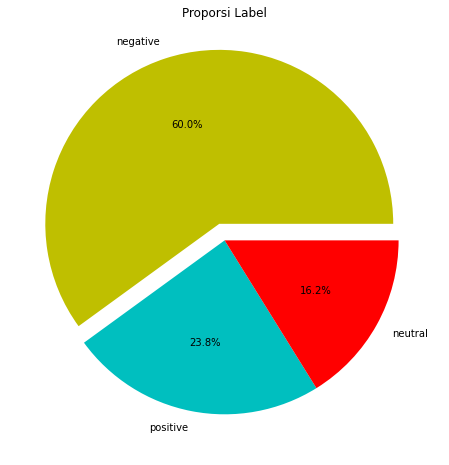

In [57]:
plt.figure(figsize=(8,8))
color=['y', 'c', 'r']
exp=[0.1,0,0]
plt.pie(df_data['polarity'].value_counts(), labels=df_data['polarity'].value_counts().index, autopct= '%1.1f%%', explode=exp, colors=color);
plt.title('Proporsi Label')

In [58]:
#Cek Hasil Analisis Sentimen dengan Lexicon

df_data.head()

,content,content_clean,content_preprocessing,polarity_score,polarity
0,"Setiap memilih kursi, bolak balik kembali ke m...",setiap memilih kursi bolak balik kembali ke me...,"[pilih, kursi, bolak, menu, lemotsampai, waktu...",-13,negative
1,Aplikasinya membantu tapi belum sempurna. Meto...,aplikasinya membantu tapi belum sempurna metod...,"[aplikasi, bantu, sempurna, metode, bayar, bgt...",-16,negative
2,"Update jadi malah lemot, gak respon. Setiap pi...",update jadi malah lemot gak respon setiap pili...,"[update, lot, gak, respon, pilih, kursi, pilih...",-6,negative
3,Aplikasi cacat! Sangat jelas kalau developer g...,aplikasi cacat sangat jelas kalau developer ga...,"[aplikasi, cacat, developer, gagal, aplikasi, ...",-34,negative
4,Aplikasi sering error saat untuk melakukan pem...,aplikasi sering error saat untuk melakukan pem...,"[aplikasi, error, mesan, jaring, wifi, lancar,...",-17,negative


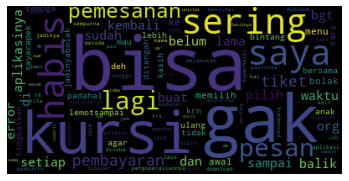

In [59]:
#Visualisasi Dalam Bentuk WordCloud

from wordcloud import WordCloud

text = df_data['content_clean'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

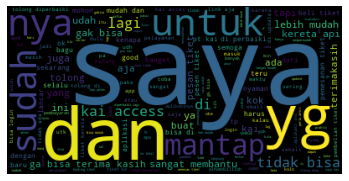

In [60]:
positive = ' '.join([text for text in df_data['content_clean'][df_data['polarity'] == 'positive']])

text = positive
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

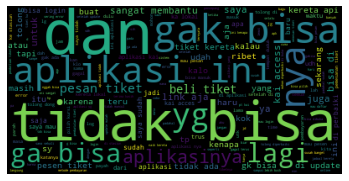

In [61]:
negative = ' '.join([text for text in df_data['content_clean'][df_data['polarity'] == 'negative']])

text = negative
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

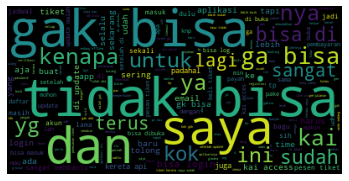

In [62]:
neutral = ' '.join([text for text in df_data['content_clean'][df_data['polarity'] == 'neutral']])

text = neutral
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()